# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot


In [3]:
sns.set()
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal?

First we need to check if the distribution of the sample is normal or not.
If we can find p-value and p-value is less than threshold (lets take 0.05) then we can say distribution is normal.
For this we can use normaltest method of scipy.stats library.

In [4]:
temperature = df['temperature']
stats.normaltest(temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

As we can see here p-valu is much bigger than significance value (0.258 > 0.05), so we can say temperature is normal distributed.
For more clarification, lets plot histogram with seaborn library.

/home/bhuvneshwars/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


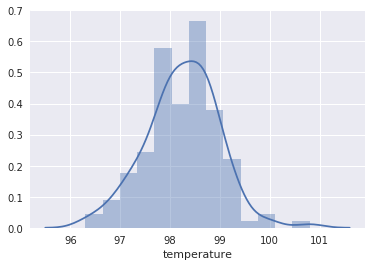

In [5]:
sns.distplot(temperature, hist=True)

## Result
As we can see from above histogram plot that distribution is normal in nature.

# 2. Is the sample size large? Are the observations independent?

Check size of dataset

In [6]:
len(df)

130

## Result
As we know that statndard size of sample should be atleast 30 as per center limit theorem but 
here sample size is 130 which much bigger than standard size.
So we can say that sample size is large enough and we should use z-statistic and if sample size is small 
or upto 30 then we should use t-statistic for hypothesis testing.
Observation will be independent here. 

# 3. Is the true population mean really 98.6 degrees F?

Here we will test below :<br/>
    <t><b>Null Hypothesis :</b> population mean is 98.6 degree F<br/>
    <t><b>Alternative Hypothesis :</b> population mean is not 98.6 degree F<br/>
Let's assume null hypothesis is true and calculate the appropriate p-value for the test. 
If it is below a threshold (say, p= 0.05), we can reject the hypothesis and if it is greater, we can accept it.

In [7]:
pop_mean = 98.6
sam_mean = temperature.mean()
sam_std = temperature.std()
sam_mean, sam_std

(98.24923076923078, 0.7331831580389454)

In [8]:
z_value = (pop_mean - sam_mean) / (sam_std / np.sqrt(len(df)))
z_value

5.454823292364079

In [9]:
p_value = stats.norm.sf(abs(z_value))
p_value


2.45107850705669e-08

As we can see p-value (.02) is smaller than threshold (taken above), 
so we can reject null hypothesis. So we can go to alternate hypothesis i.e. population mean is not 98.6 degree F.

<br>Let's do other statistics:<br>
We have already z-value consider as t-value

In [10]:
t_value = z_value
# we use direct ttest method of scipy.stats library to get t-value and p-value
# one_sample = stats.ttest_1samp(df['temperature'], popmean=98.6)
# one_sample
stats.t.sf(t_value, len(df)-1)

1.2053160207804971e-07

So here also p-value is small which indicate to reject null hypothesis.

## Result
1. p-value is small, so we can reject null hypothesis<br>
2. As we are compairing sample mean to population mean, so one-sample test is more appropriate.<br>
3. sample size is large, so z statistic is more appropriate to use. <br>
4. t-statistics also show same result.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [11]:
df10 = df.head(10)
temperature = df10['temperature']
pop_mean = 98.6
sam_mean = temperature.mean()
sam_std = temperature.std()
sam_mean, sam_std

(98.57, 0.5457919831665624)

z-statistics

In [12]:
z_value = (pop_mean - sam_mean) / (sam_std / np.sqrt(len(df10)))
p_value = stats.norm.sf(abs(z_value))
p_value

0.4310043504951995

Here p-value is less than threshold so we can reject null hypothesis

t-statistics

In [13]:
t_value = (pop_mean - sam_mean) / (sam_std / np.sqrt(len(df10)))
p_value = stats.t.sf(t_value, len(df10)-1)
p_value

0.4329277440365156

Here p-value is less than threshold so we can reject null hypothesis

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

Let us first calculate the true mean of human temperature with a confidence interval of 95%. Since, we've already calculated the sample mean and sample standard deviation, this step should be fairly straightforward.

In [19]:
z_val = stats.norm.ppf(0.95)
sam_mean = temperature.mean()
sam_std = temperature.std()

upper_temp = sam_mean + (z_val * (sam_std / np.sqrt(len(temperature))))
lower_temp = sam_mean - (z_val * (sam_std / np.sqrt(len(temperature))))

lower_temp, upper_temp

(98.2861071798405, 98.85389282015949)

From the above results, we are 95% confident that the true mean is somewhere between 98.286F and 98.854F. Therefore, we can consider any temperature outside this range to be abnormal.
## Conclusion

A body temperature below 98.123 and above 98.375 should be considered abnormal.

# 6. Is there a significant difference between males and females in normal temperature?

In [ ]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']
male_temp = df_male['temperature']
female_temp = df_female['temperature']

From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. 
The next step is to determine if this difference is a statistically significant one.<br>
For hypothesis testing, the following are defined:<br>
    <b>      -> </b>Null Hypothesis: The true mean temperature for men and women are the same.<br>
    <b>      -> </b>Alternate Hypothesis: The true mean temperature for men and women are not the same.<br>

The threshold value of $\alpha$ is assumed to be 0.05. Assuming Null Hypothesis is true.

In [ ]:
two_sample = stats.ttest_ind(male_temp, female_temp)
two_sample

The t-statistic is -2.285 and the p-value is 0.024. As explained earlier, the p-value of 0.024 corresponds to 2.4%.
This means there is a 2.4% chance that our result could be random (i.e. happened by chance). That’s pretty low and 
therefore it’s highly unlikely that the mean temperatures of Male and Female are equal.